**Importing Required Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

**Importing Dataset**

In [2]:
df = pd.read_csv("C:/Users/dhine/Desktop/ML/Projects/03 Covid 19 Forecasting/covid_19_clean_complete.csv")

In [3]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [4]:
#Renaming columns for convenience
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered"
                   },inplace = True)

In [5]:
df.head(3)

state      country       lat       long        date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   

   recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   lat         49068 non-null  float64
 3   long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   deaths      49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df['active'] = df['confirmed']-df['deaths']-df['recovered']
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  Active             WHO Region  active  
0              0       0          0       0  Eastern Mediterranean       0  
1              0       0          0       0                 Europe       0  
2              0       0          0       0                 Africa       0  
3              0       0          0       0                 Europe       0  
4              0       0          0       0                 Africa       0  
...          ...     ...        ...     ...                    ...     ...  
49063        865      14        734     117                 Africa     117  
49064       1691     483        833     375  Eastern Mediterranean     375  
49065        354       7        328      19                 Africa      19  
49066       7235      60       6028    1147                 Europe    1147  
49067        505      12        128     365                 Africa     365  

[49068 rows x 11 columns]

In [8]:
#Check Top Cases
top = df[df['date']==df['date'].max()]
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  Active             WHO Region  active  
48807      36263    1269      25198    9796  Eastern Mediterranean    9796  
48808       4880     144       2745    1991                 Europe    1991  
48809      27973    1163      18837    7973                 Africa    7973  
48810        907      52        803      52                 Europe      52  
48811        950      41        242     667                 Africa     667  
...          ...     ...        ...     ...                    ...     ...  
49063        865      14        734     117                 Africa     117  
49064       1691     483        833     375  Eastern Mediterranean     375  
49065        354       7        328      19                 Africa      19  
49066       7235      60       6028    1147                 Europe    1147  
49067        505      12        128     365                 Africa     365  

[261 rows x 11 columns]

In [9]:
#check Contry wise max case count
world = top.groupby('country')[['confirmed','deaths','active']].sum().reset_index()
world

country  confirmed  deaths  active
0           Afghanistan      36263    1269    9796
1               Albania       4880     144    1991
2               Algeria      27973    1163    7973
3               Andorra        907      52      52
4                Angola        950      41     667
..                  ...        ...     ...     ...
182  West Bank and Gaza      10621      78    6791
183      Western Sahara         10       1       1
184               Yemen       1691     483     375
185              Zambia       4552     140    1597
186            Zimbabwe       2704      36    2126

[187 rows x 4 columns]

In [10]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,100000],
                       color_continuous_scale="reds",
                       title="Countries with Active Cases")
figure.update_layout(width=1000, height=700)
figure.show()

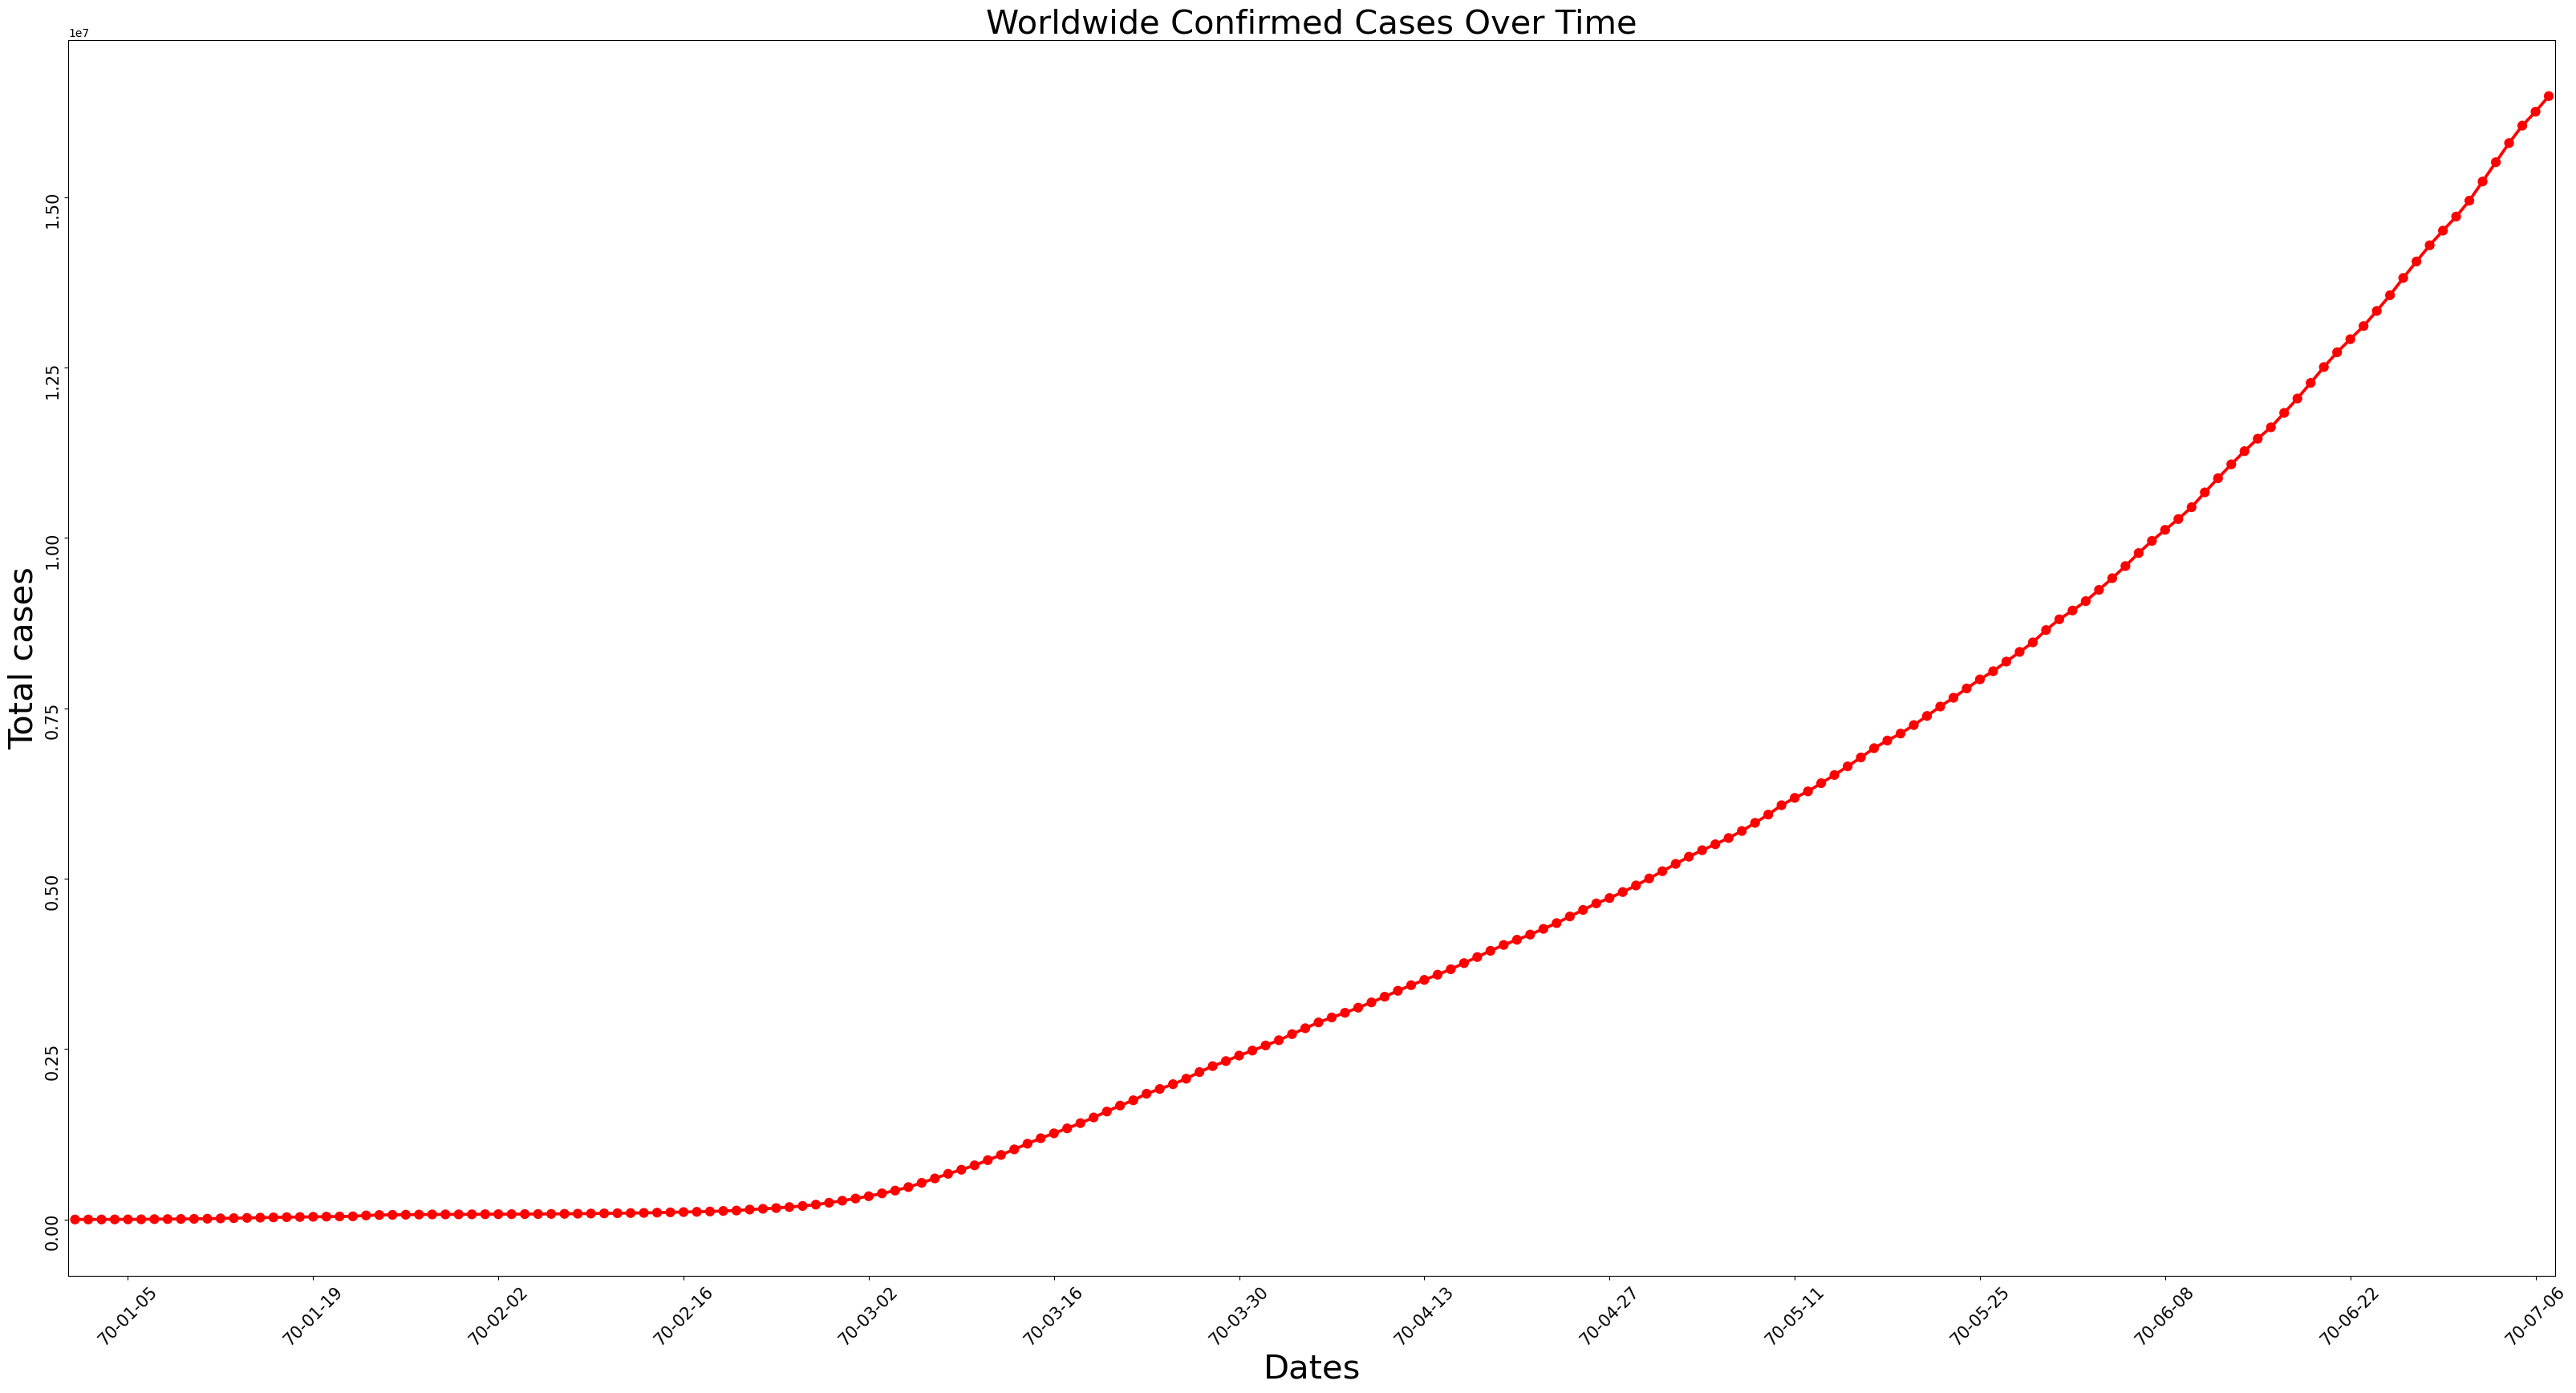

In [11]:
import matplotlib.dates as mdates
# Check TREND OF HOW COVID SPREAD

plt.figure(figsize=(40,20))
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby("date")[['confirmed']].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='r')
ax.set(xlabel="Dates",ylabel="Total cases")

#Reduce the number of date labels (show every 14th day for clarity)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))

#Format the date labels
ax.xaxis.set_major_formatter(mdates.DateFormatter("%y-%m-%d"))

In [12]:
top_actives = top.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

country   active
0               US  2816444
1           Brazil   508116
2            India   495499
3   United Kingdom   254427
4           Russia   201097
5     South Africa   170537
6         Colombia   117163
7           France   108928
8           Canada   107514
9             Peru    98752
10      Bangladesh    97577
11           Spain    93613
12       Argentina    91782
13          Sweden    73695
14     Philippines    53649
15           Egypt    52992
16          Mexico    47657
17     Netherlands    47064
18         Bolivia    47056
19    Saudi Arabia    43238

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

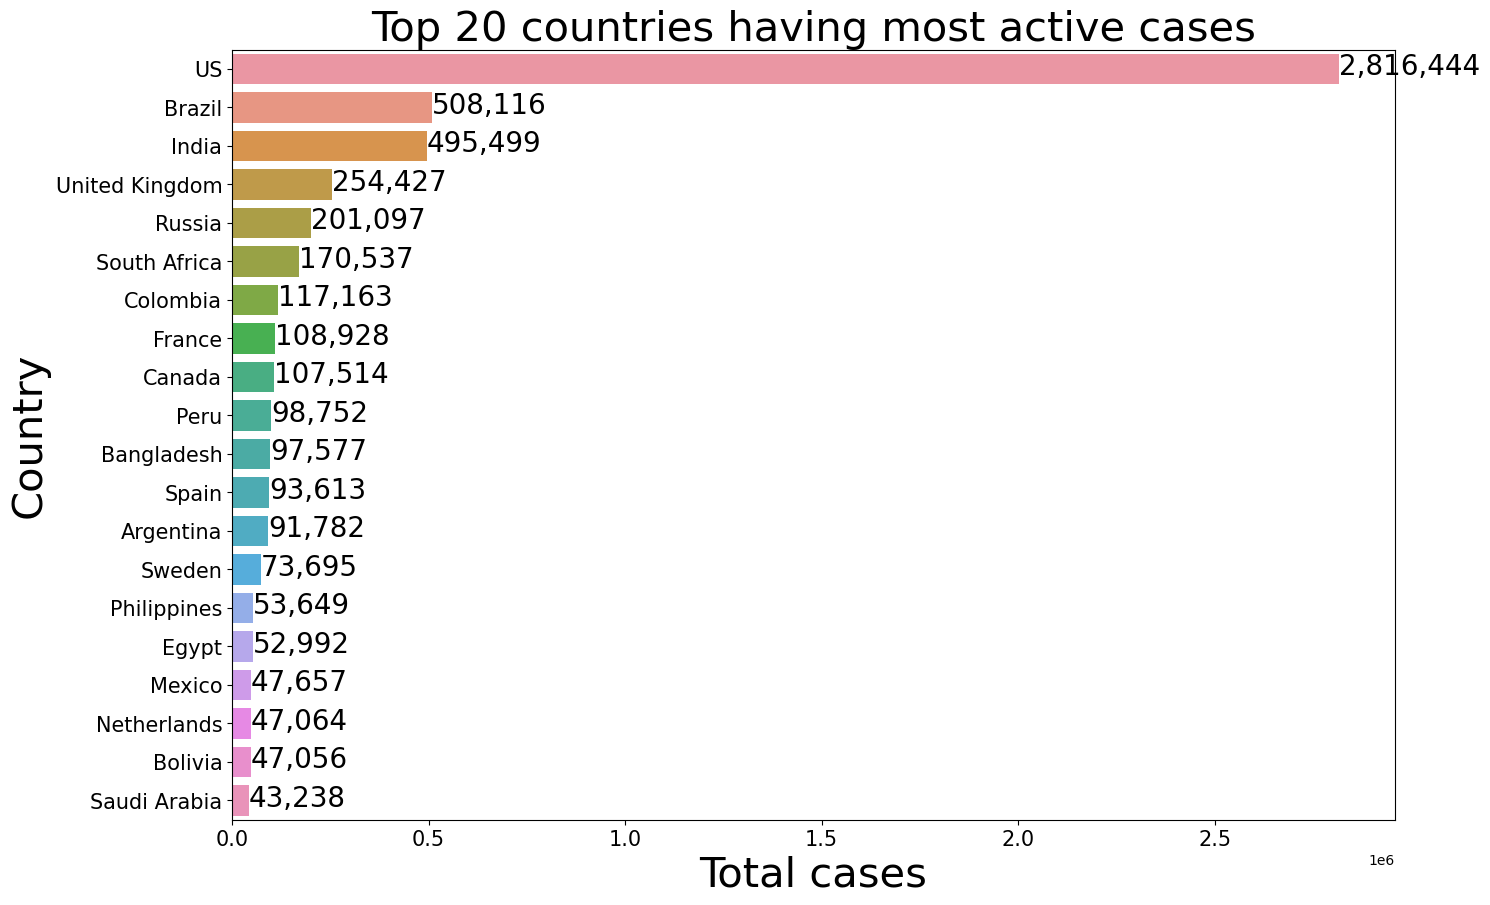

In [13]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
for i, (value,name) in enumerate(zip(top_actives.active,top_actives.country)):
    ax.text(value, i-.05,f'{value:,.0f}',size=20,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [14]:
# TOP DEATH RATES
top_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

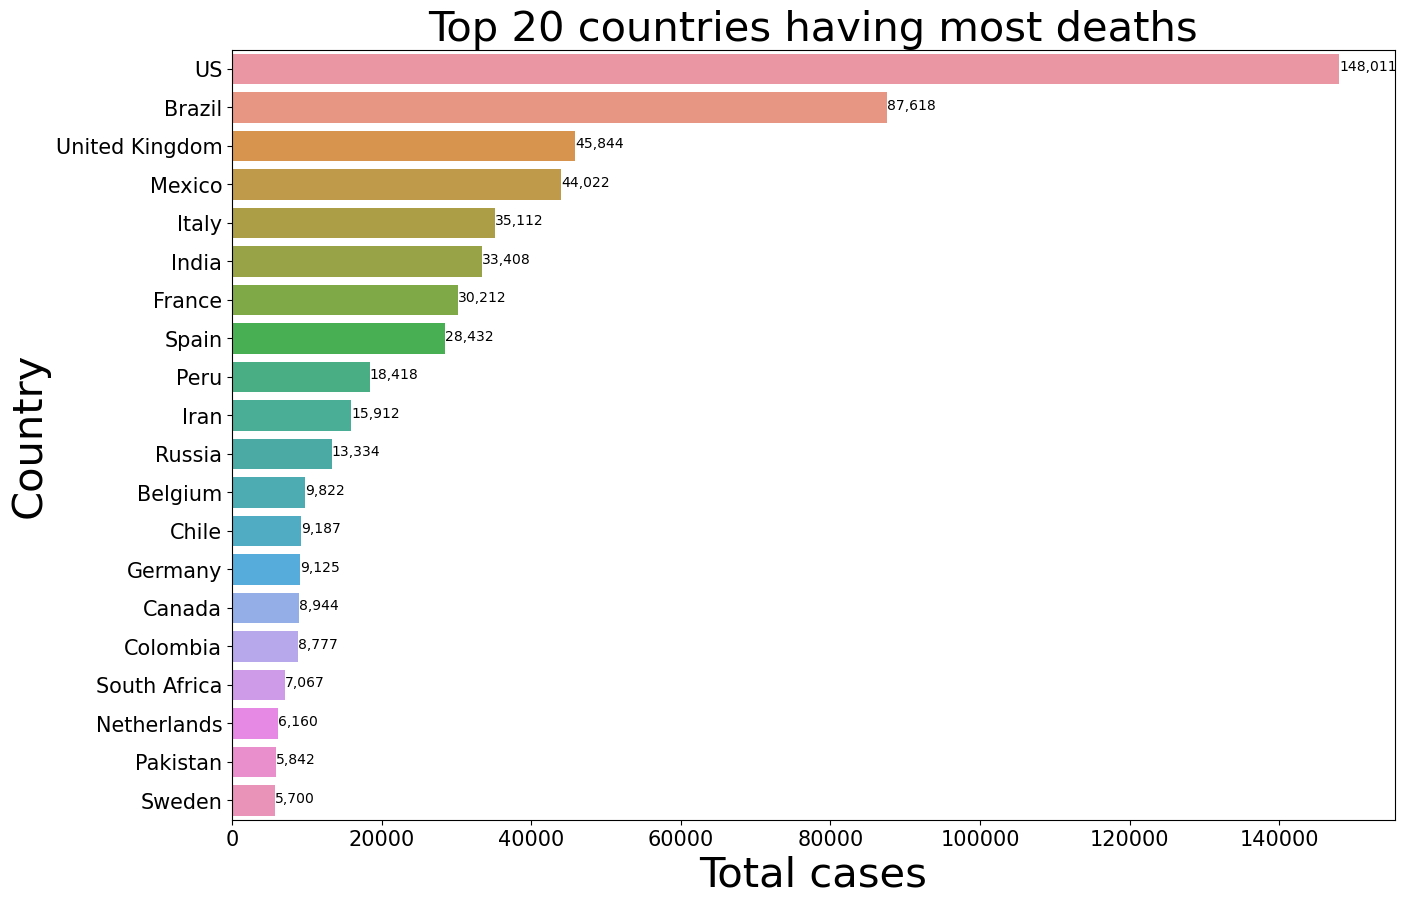

In [15]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most deaths",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
for i, (value,name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
  ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [16]:
# NUMBER OF PEOPLE RECOVERED
recovery = top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

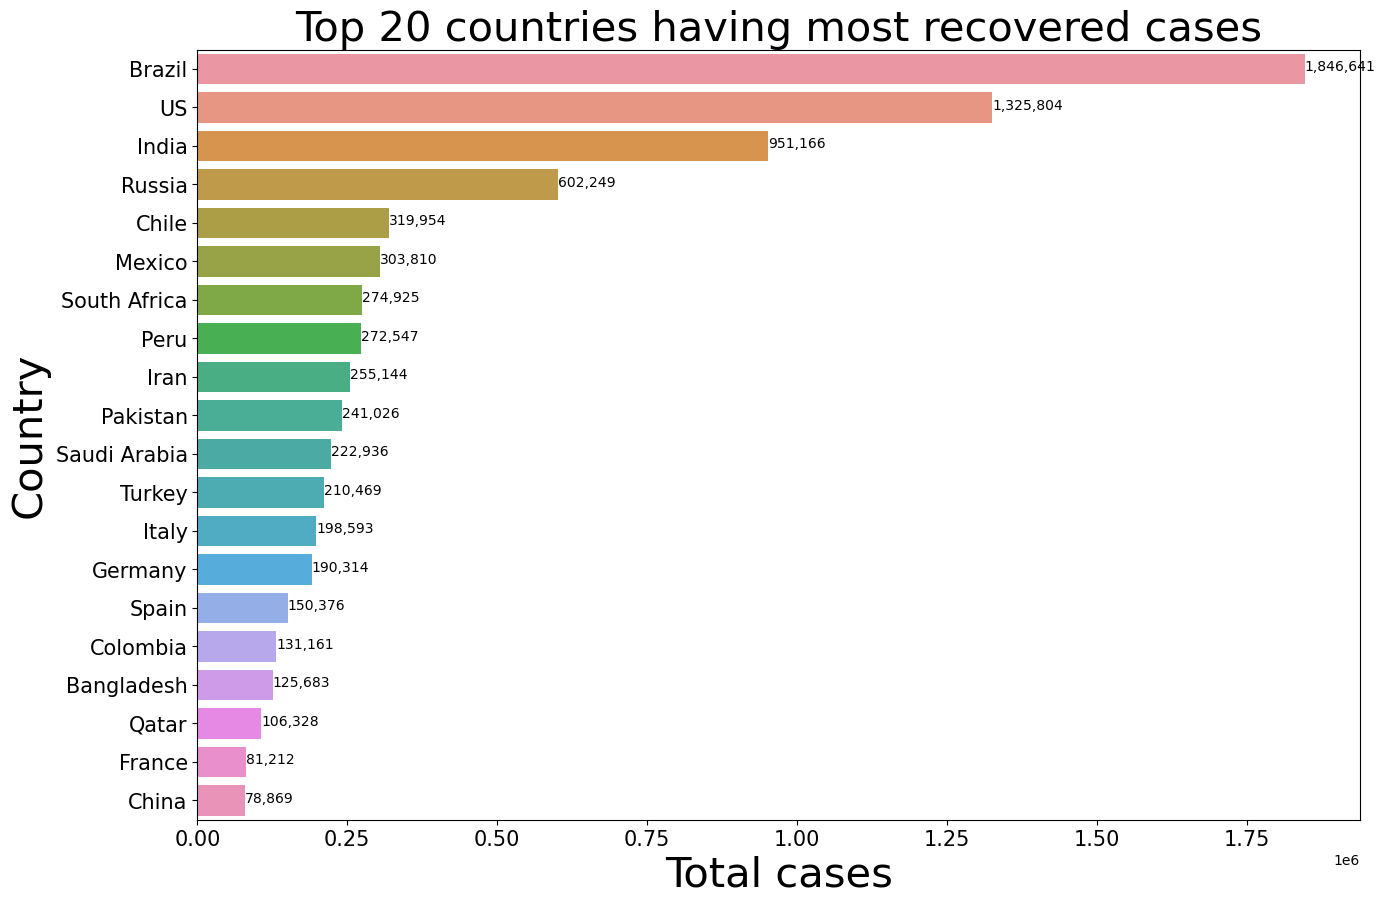

In [17]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most recovered cases",fontsize=30)
ax = sns.barplot(x=recovery.recovered, y=recovery.country)
for i, (value,name) in enumerate(zip(recovery.recovered,recovery.country)):
  ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [18]:
#Cheack Top 5 Country Wise Case List
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby(by = "date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
brazil

us = df[df.country == "US"]
us = us.groupby(by = "date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
us

uk = df[df.country == "United Kingdom"]
uk = uk.groupby(by = "date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
uk

india = df[df.country == "India"]
india = india.groupby(by = "date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
india

Russia = df[df.country == "Russia"]
Russia = Russia.groupby(by = "date")[["recovered","deaths","confirmed","active"]].sum().reset_index()
Russia

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     579295   12873     793720  201552
184  2020-07-24     587728   13026     799499  198745
185  2020-07-25     596064   13172     805332  196096
186  2020-07-26     599172   13249     811073  198652
187  2020-07-27     602249   13334     816680  201097

[188 rows x 5 columns]

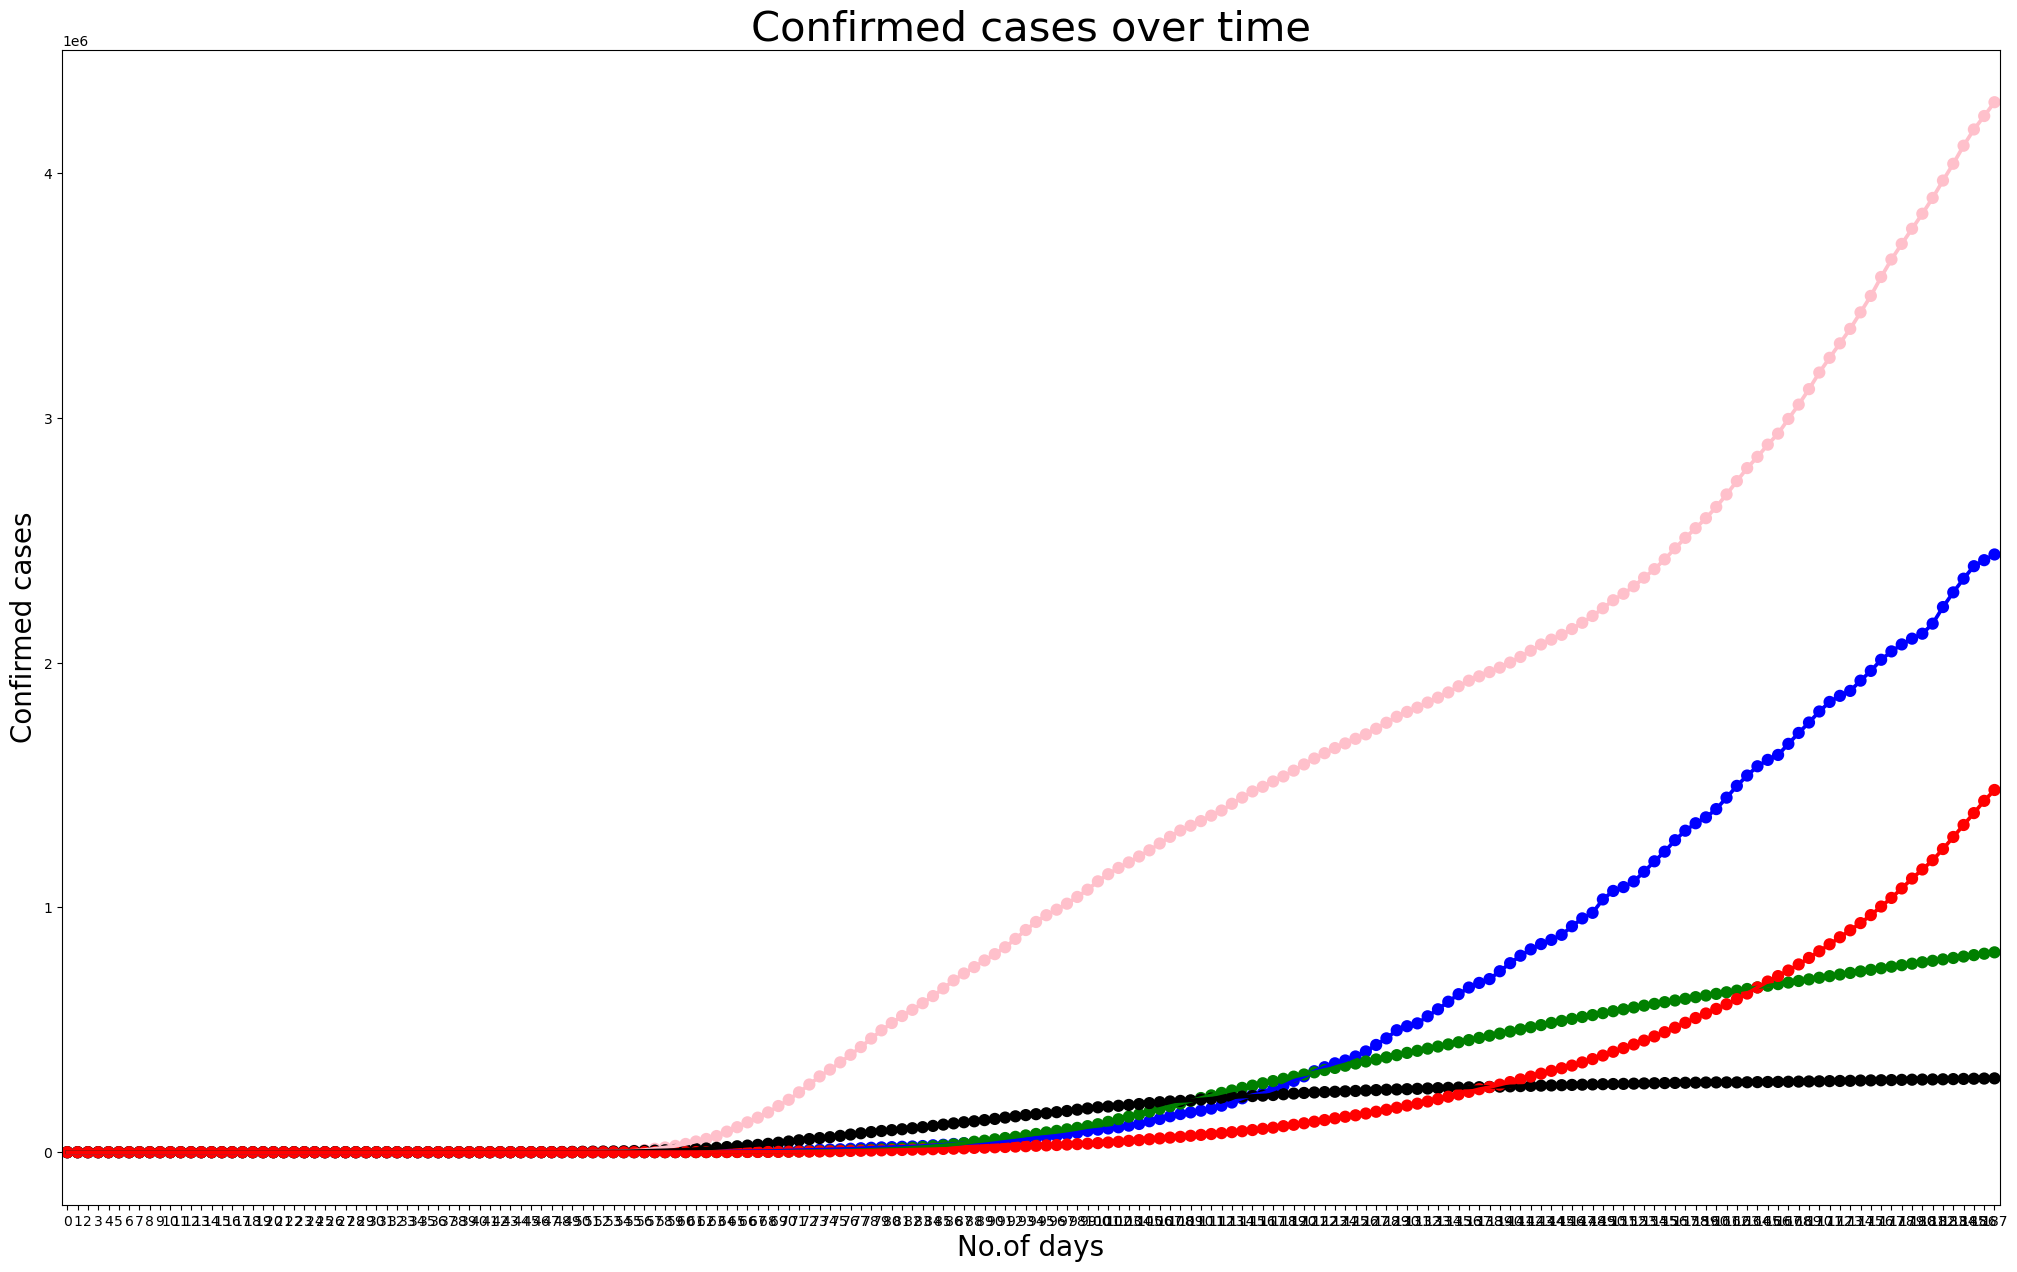

In [19]:
#plot Confimed Cases Top 5 

plt.figure(figsize=(25,15))
sns.pointplot(x=brazil.index,y=brazil.confirmed,color="Blue")
sns.pointplot(x=us.index,y=us.confirmed,color="Pink")
sns.pointplot(x=Russia.index,y=Russia.confirmed,color="Green")
sns.pointplot(x=uk.index,y=uk.confirmed,color="Black")
sns.pointplot(x=india.index,y=india.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

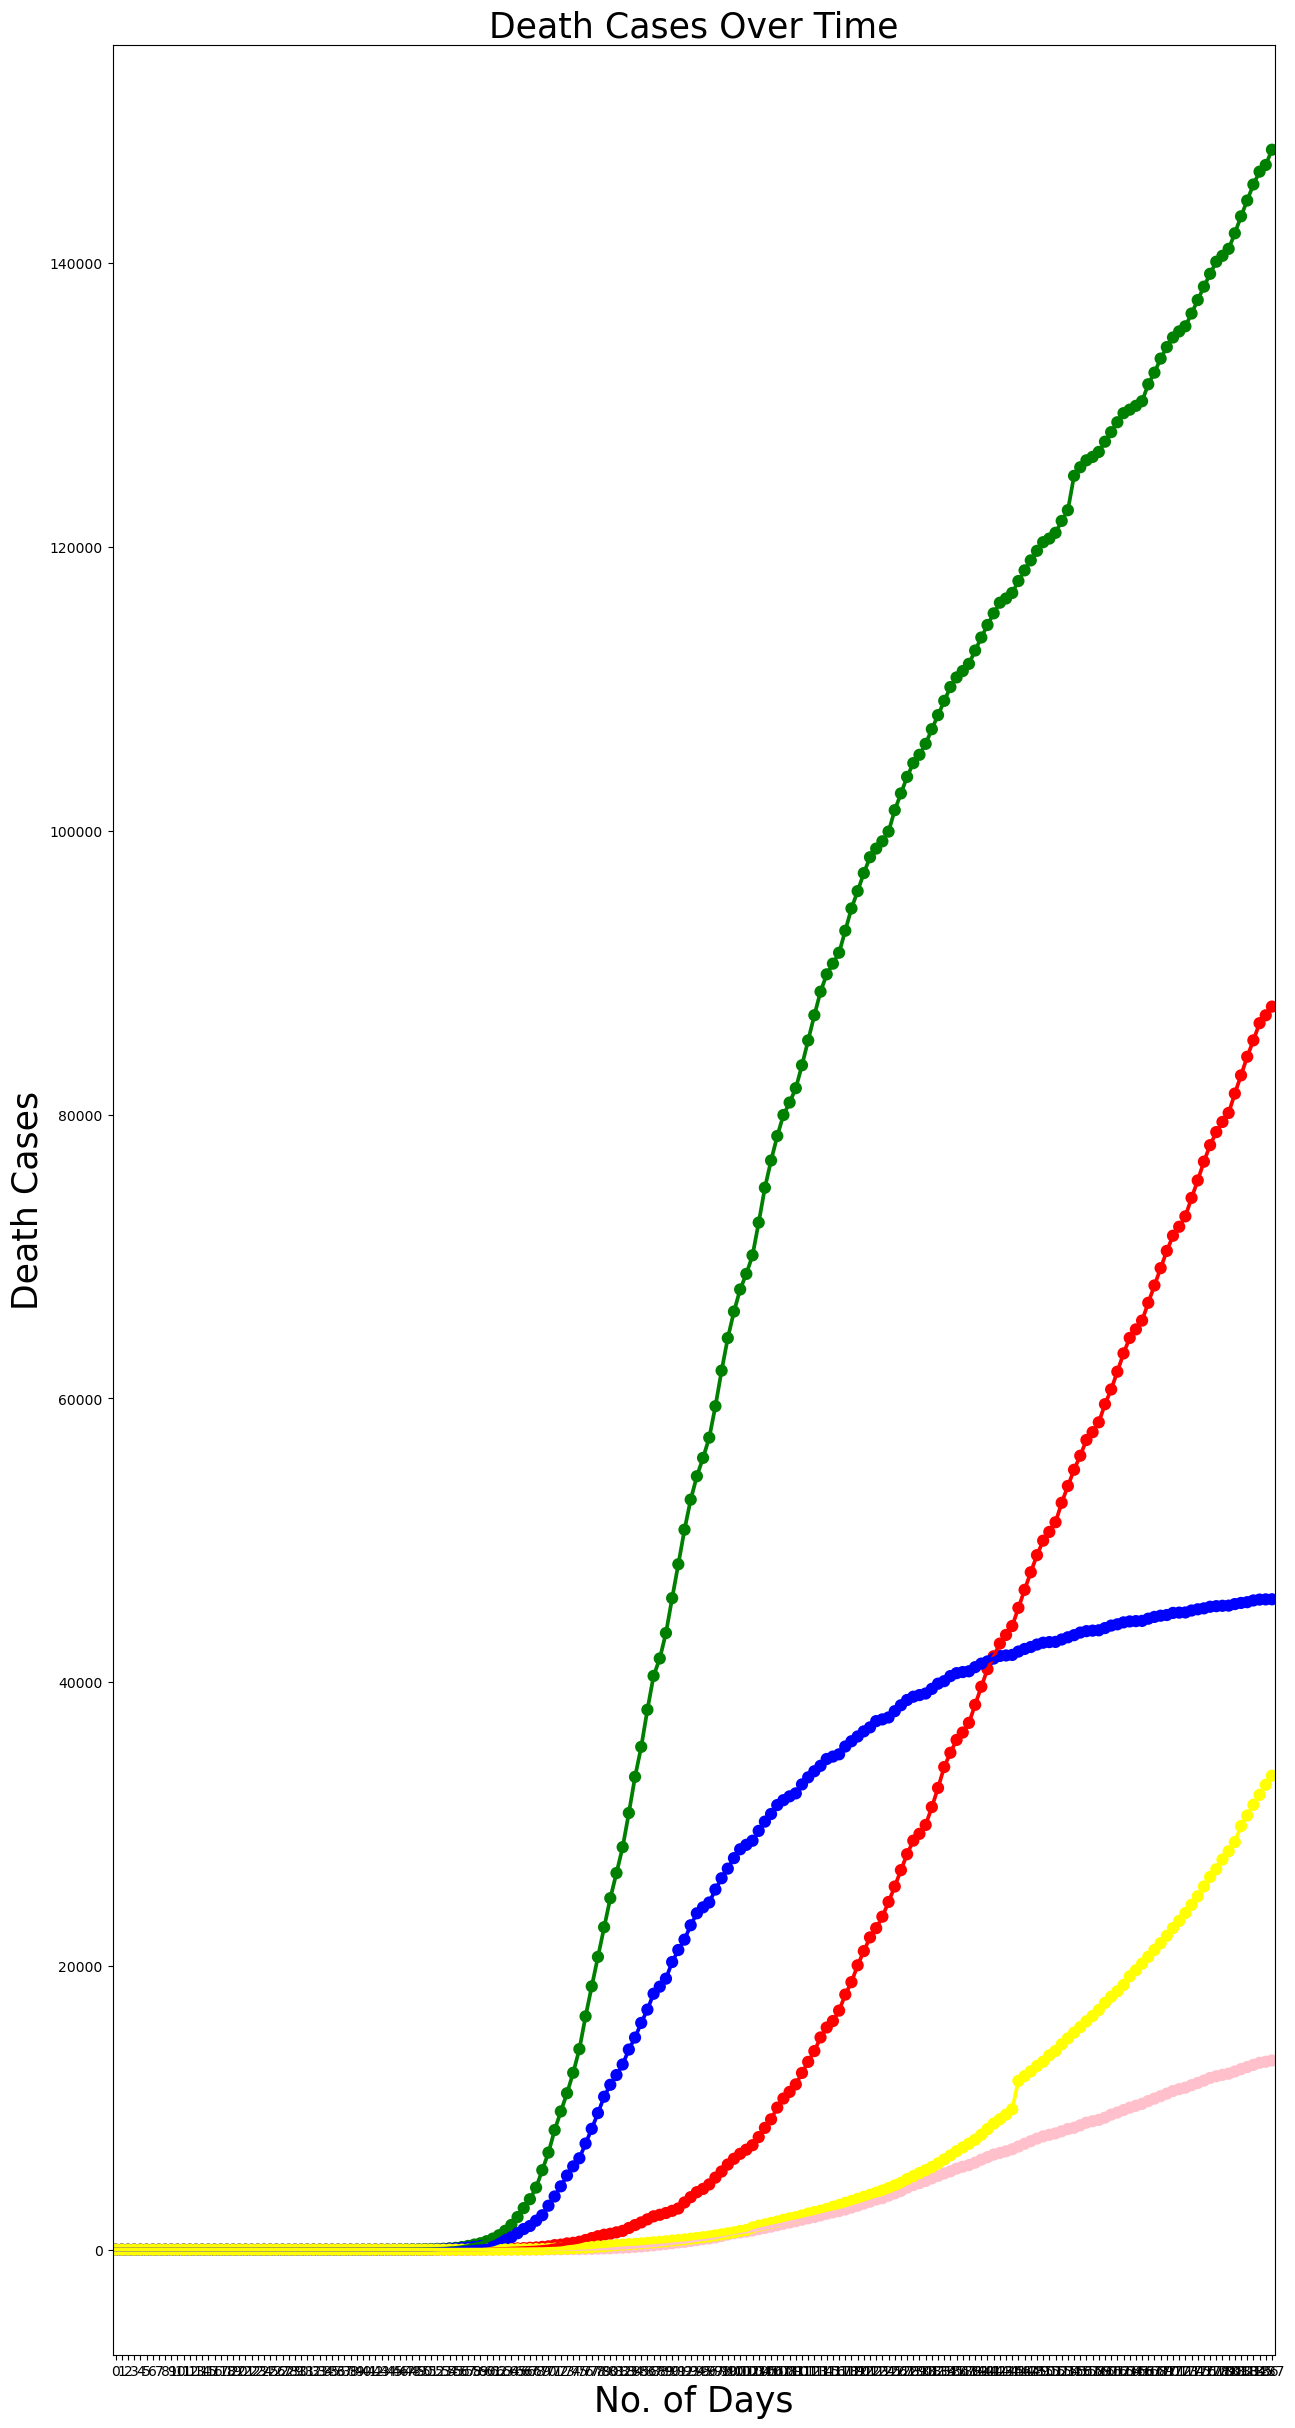

In [20]:
#plot Death Cases Top 5 Country

plt.figure(figsize=(15,30))
sns.pointplot(x=brazil.index,y=brazil.deaths,color="Red")
sns.pointplot(x=us.index,y=us.deaths,color="Green")
sns.pointplot(x=Russia.index,y=Russia.deaths,color="Pink")
sns.pointplot(x=uk.index,y=uk.deaths,color="Blue")
sns.pointplot(x=india.index,y=india.deaths,color="Yellow")

plt.title("Death Cases Over Time", fontsize=25)
plt.ylabel("Death Cases",fontsize=25)
plt.xlabel("No. of Days",fontsize=25)
plt.show()

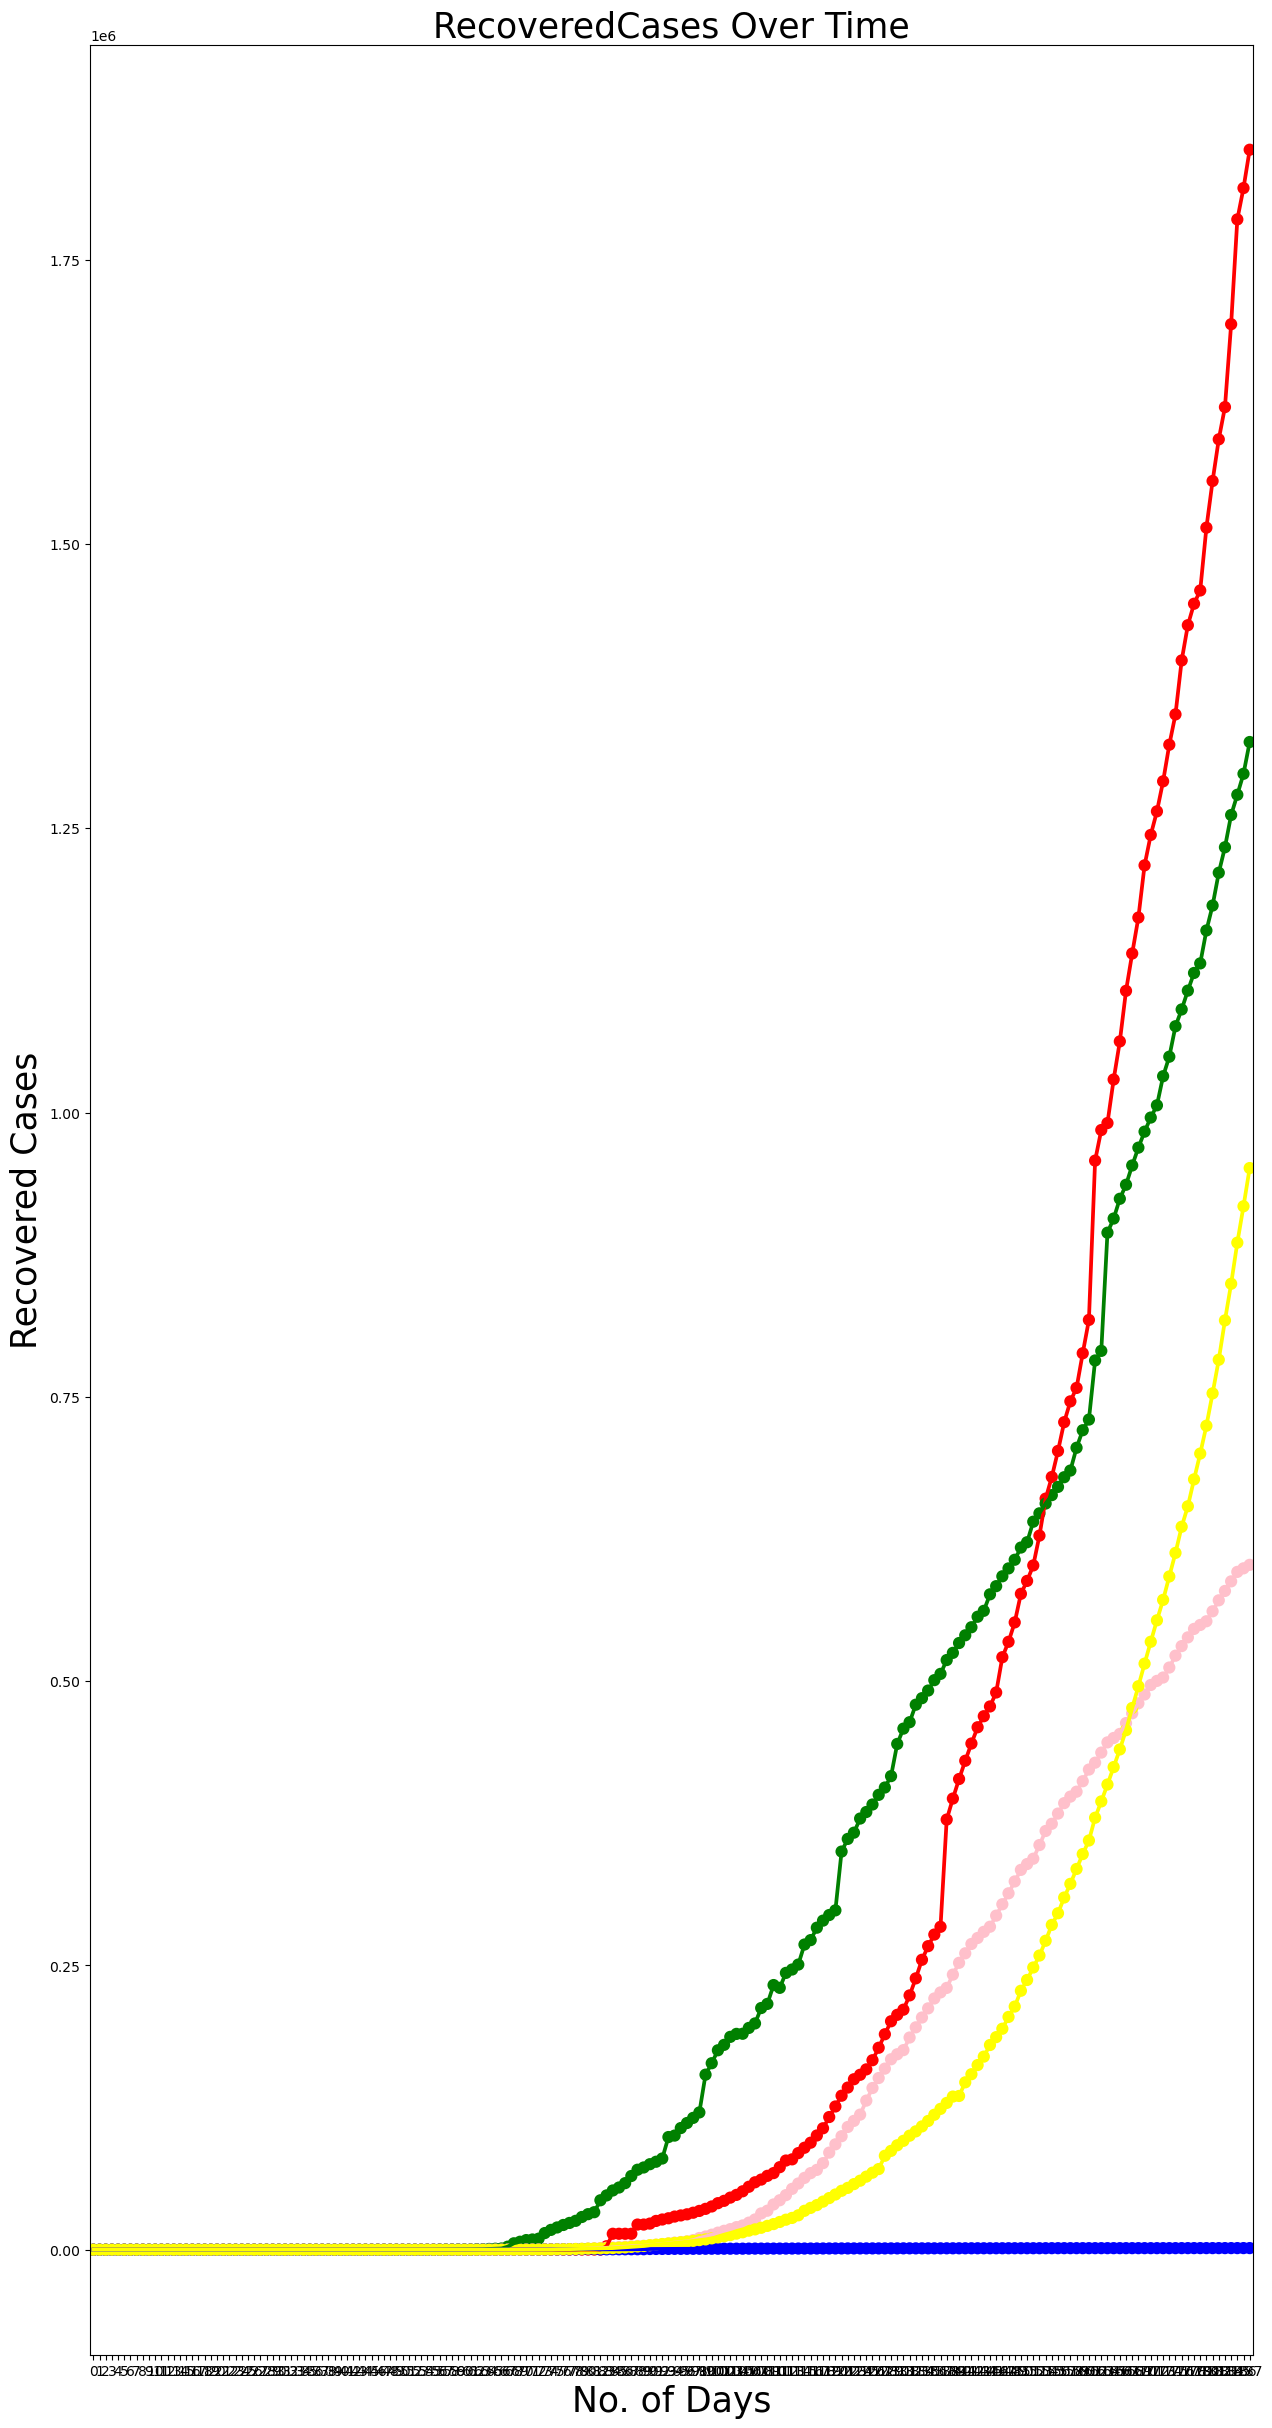

In [21]:
#plot Recovered Cases Top 5 Country

plt.figure(figsize=(15,30))
sns.pointplot(x=brazil.index,y=brazil.recovered,color="Red")
sns.pointplot(x=us.index,y=us.recovered,color="Green")
sns.pointplot(x=Russia.index,y=Russia.recovered,color="Pink")
sns.pointplot(x=uk.index,y=uk.recovered,color="Blue")
sns.pointplot(x=india.index,y=india.recovered,color="Yellow")

plt.title("RecoveredCases Over Time", fontsize=25)
plt.ylabel("Recovered Cases",fontsize=25)
plt.xlabel("No. of Days",fontsize=25)
plt.show()

In [22]:
#Forecast Model 
#pip install prophet
#pip show prophet
!pip install prophet

In [23]:
from prophet import Prophet
import os
os

<module 'os' (frozen)>

In [24]:
data=pd.read_csv('C:/Users/dhine/Desktop/ML/Projects/03 Covid 19 Forecasting/covid_19_clean_complete.csv',parse_dates=['Date'])
data.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [26]:
#Find out confirmed case date wise
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.head()

Date  Confirmed
0 2020-01-22        555
1 2020-01-23        654
2 2020-01-24        941
3 2020-01-25       1434
4 2020-01-26       2118

In [27]:
#change column name for prophet library require
# ds = datetime
#y target value

confirmed.columns = ['ds','y']
confirmed ['ds']=pd.to_datetime(confirmed['ds'])
confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [28]:
#create Prophet Model For Confirmed 

m = Prophet(interval_width=0.95) # 0.05 error 0.95 mean 95% Confidence
m.fit(confirmed)
confirmed_feature = m.make_future_dataframe(periods=7)  # Forcasing Next 7 Days
confirmed_feature.tail(7)

10:48:03 - cmdstanpy - INFO - Chain [1] start processing
10:48:04 - cmdstanpy - INFO - Chain [1] done processing


ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [29]:
confirmed_forecast = m.predict(confirmed_feature)
confirmed_forecast.tail(7)
confirmed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_lower']].tail(7)

ds          yhat    yhat_lower    yhat_lower
188 2020-07-28  1.632401e+07  1.614677e+07  1.614677e+07
189 2020-07-29  1.653405e+07  1.638563e+07  1.638563e+07
190 2020-07-30  1.674820e+07  1.658805e+07  1.658805e+07
191 2020-07-31  1.696362e+07  1.678980e+07  1.678980e+07
192 2020-08-01  1.717143e+07  1.699372e+07  1.699372e+07
193 2020-08-02  1.736922e+07  1.718185e+07  1.718185e+07
194 2020-08-03  1.756410e+07  1.738418e+07  1.738418e+07

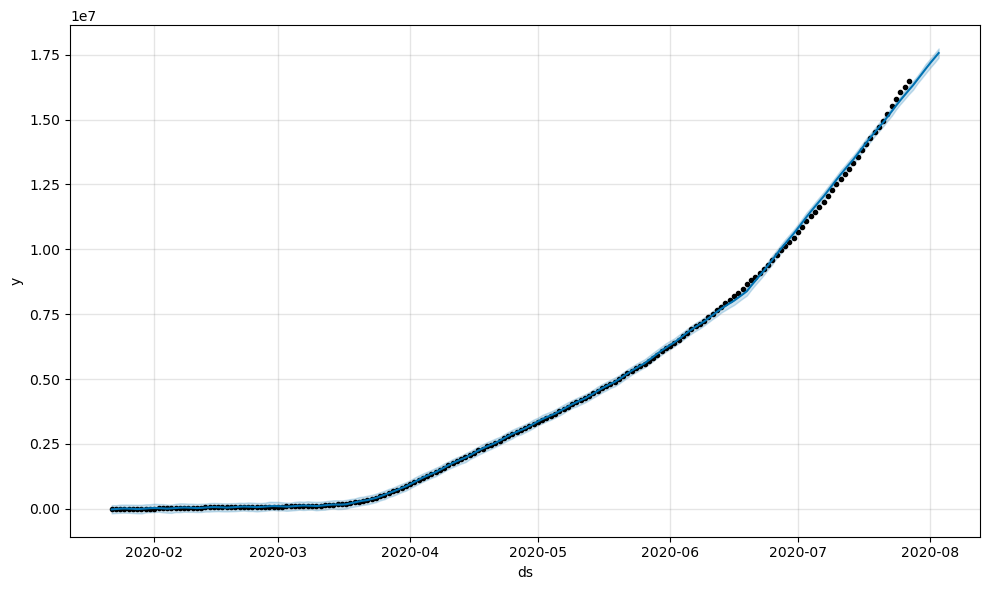

In [30]:
#plot Confirmed Cases Forecasting
confirmed_forecast_plot = m.plot(confirmed_forecast)

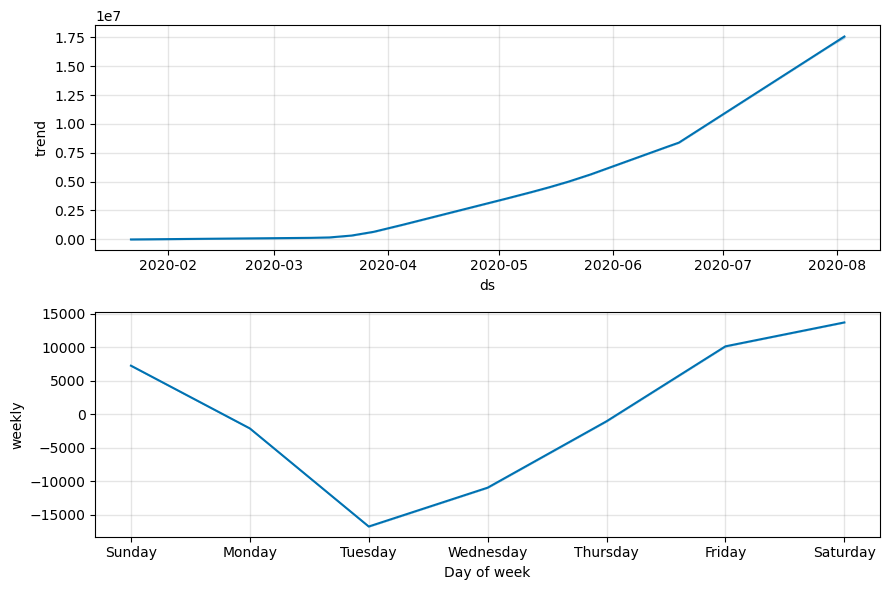

In [31]:
confirmed_forecast_plot1 = m.plot_components(confirmed_forecast)

In [32]:
#Find out Recovered case date wise
recovered = data.groupby('Date').sum()['Recovered'].reset_index()
recovered.head()

Date  Recovered
0 2020-01-22         28
1 2020-01-23         30
2 2020-01-24         36
3 2020-01-25         39
4 2020-01-26         52

In [33]:
#change column name for prophet library require
# ds = datatime
#y target value

recovered.columns = ['ds','y']
recovered ['ds']=pd.to_datetime(confirmed['ds'])

In [34]:
m=Prophet(interval_width=0.95)
m.fit(recovered)
recovered_future=m.make_future_dataframe(periods=7)
recovered_future.tail(7)

10:48:05 - cmdstanpy - INFO - Chain [1] start processing
10:48:05 - cmdstanpy - INFO - Chain [1] done processing


ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [35]:
recovered_forecast = m.predict(recovered_future)
recovered_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  9.598531e+06  9.480662e+06  9.718561e+06
191 2020-07-31  9.740095e+06  9.619434e+06  9.858044e+06
192 2020-08-01  9.880394e+06  9.749684e+06  1.001259e+07
193 2020-08-02  1.000646e+07  9.873924e+06  1.014974e+07
194 2020-08-03  1.014305e+07  1.001065e+07  1.028084e+07

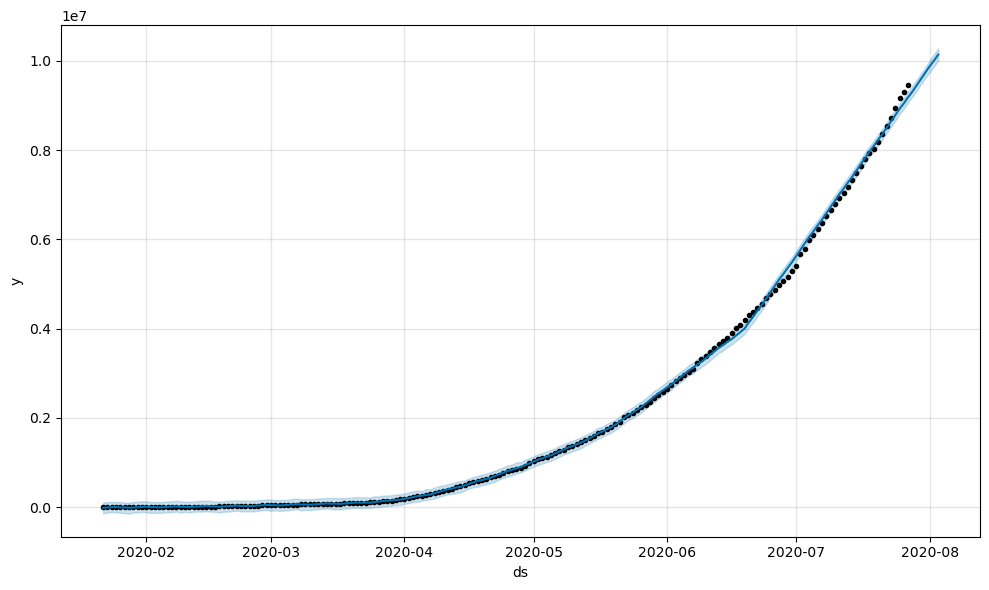

In [36]:
#plot recovered Case 
recovered_forecast_plot = m.plot(recovered_forecast)

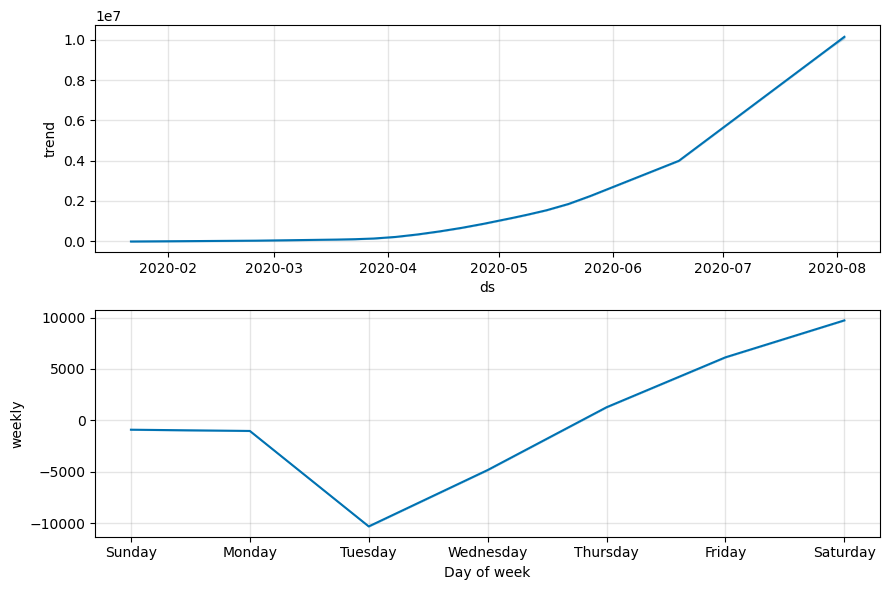

In [37]:
#plot Recoved case Component 
recovered_forecast_plot1 = m.plot_components(recovered_forecast)

In [38]:
#find out Death Cased Date wise
deaths = data.groupby('Date').sum()['Deaths'].reset_index()

In [39]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(confirmed['ds'])
deaths

ds       y
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [40]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
deaths_fearure = m.make_future_dataframe(periods=7)
deaths_fearure.tail(7)

10:48:06 - cmdstanpy - INFO - Chain [1] start processing
10:48:06 - cmdstanpy - INFO - Chain [1] done processing


ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [41]:
#death Forecasting 
deaths_forcasting = m.predict(deaths_fearure)

In [42]:
deaths_forcasting[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
190 2020-07-30  663521.743356  660166.985033  666584.723812
191 2020-07-31  669038.962960  665341.179824  672579.318860
192 2020-08-01  673922.465056  670166.977439  678111.501912
193 2020-08-02  678060.469456  673612.353062  682687.983674
194 2020-08-03  682351.854619  676953.400335  687805.976728

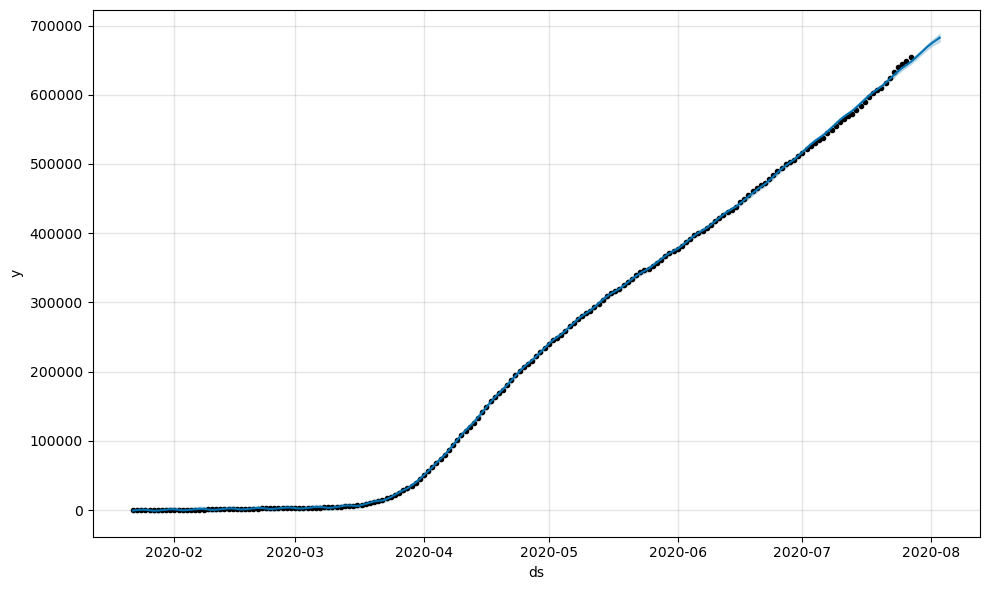

In [43]:
#Plot Forcasting Values
deaths_forcasting_plot = m.plot(deaths_forcasting)

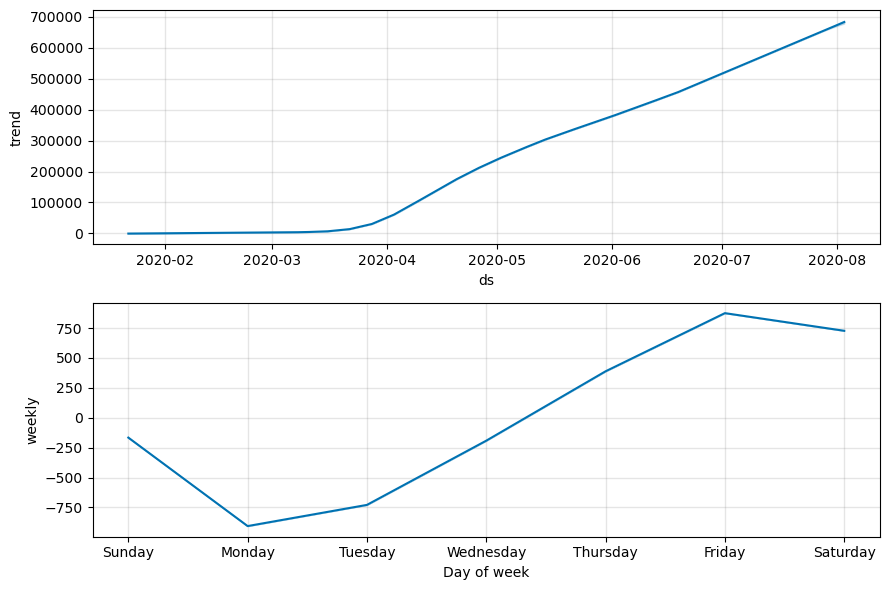

In [44]:
#plot components
deaths_forcasting_plot1 = m.plot_components(deaths_forcasting)